## Illustrative Code for "Interpreting Feature Importance in Wavelet-Based Deep Learning for Multi-Time Scale Affect Forecasting"

This code produces the plots and estimation results for illustrations I-II reported in:

Chow, Cho, Xiong, Li, Shen, Das, Ji, & Kumara (2025, submitted). Interpreting Feature Importance in Wavelet-Based Deep Learning for Multi-Time Scale Affect Forecasting. Proceedings of the International Meeting of the Psychometric Society.

First we load some packages and define some functions that we are going to use.

### Load packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import torch
from kymatio import Scattering1D

### Define Functions

In [1]:
def compute_frequency_bounds(J, Q, f_s):
    """
    Computes the corrected central, lower, and upper frequencies of scattering wavelets.
    
    Args:
        J (int): Number of octaves (scales).
        Q (int): Number of wavelets per octave.
        f_s (float): Sampling frequency.

    Returns:
        central_freqs (numpy.ndarray): Central frequencies of wavelets.
        lower_bounds (numpy.ndarray): Lower frequency bounds.
        upper_bounds (numpy.ndarray): Upper frequency bounds.
    """
    central_freqs = np.array([f_s / (2 ** (J - j + q / Q + 1)) for j in range(J) for q in range(Q)])
    
    # Compute lower and upper frequency bounds
    lower_bounds = central_freqs * 2**(-1/(2*Q))
    upper_bounds = central_freqs * 2**(1/(2*Q))

    # ✅ Sort frequencies in descending order
    sort_idx = np.argsort(-central_freqs)
    central_freqs = central_freqs[sort_idx]
    lower_bounds = lower_bounds[sort_idx]
    upper_bounds = upper_bounds[sort_idx]
    
    return central_freqs, lower_bounds, upper_bounds

def create_activationMap(selected_Sx, selected_freqs, selected_lower_bounds, selected_upper_bounds, 
                         colors="Greens", barLabel = "Magnitudes of Activated Scattering Coefficients",
                         title="(B) Scattering Coefficients Heatmap", order_1_start = 1, order_2_start =8, plot_2nd = False, saveFile = None):
    plt.figure(figsize=(12, 6))
    ax = sns.heatmap(np.log1p(np.abs(selected_Sx)), cmap=colors, cbar=True, xticklabels=True, yticklabels=False)

# Format the Colorbar
    cbar = ax.collections[0].colorbar
    cbar.set_label(barLabel, fontsize=14)
    cbar.ax.tick_params(labelsize=12)

    # 7Set Axis Labels & Titles
    plt.xlabel("Time Windows", fontsize=16)
    plt.ylabel("Frequency Band", fontsize=16)
    plt.title(title, fontsize=16)

    # Add Time Window Labels (X-axis)
    num_time_windows = selected_Sx.shape[1]
    xtick_positions = np.linspace(0, num_time_windows, min(10, num_time_windows), dtype=int)
    ax.set_xticks(xtick_positions)
    ax.set_xticklabels(xtick_positions, fontsize=12)

    # Set Y-axis Tick Labels with Frequency Info
    yticks = np.arange(len(selected_freqs) + 1)  # +1 for 0th order coefficient
    y_labels = ["0th Order"] + [f"{cf:.2f} Hz\n({lb:.2f} - {ub:.2f} Hz)" for cf, lb, ub in zip(selected_freqs, selected_lower_bounds, selected_upper_bounds)]
    ax.set_yticks(ticks=yticks)
    ax.set_yticklabels(y_labels, fontsize=12)

    # Set Background to White
    ax.set_facecolor("white")
    
    
    ax.axhline(y=order_1_start , color="blue", linestyle="--", linewidth=1.5)
    plt.text(num_time_windows * 0.85, order_1_start - 0.3, "1st-order starts", fontsize=12, color="blue", fontweight="bold")

    if (plot_2nd):
        ax.axhline(y=order_2_start, color="red", linestyle="--", linewidth=1.5)
        plt.text(num_time_windows * 0.85, order_2_start - 0.3, "2nd-order starts", fontsize=12, color="red", fontweight="bold")

    if (saveFile != None):
        plt.savefig(saveFile, format="pdf", bbox_inches="tight", dpi=300)

    # Show the heatmap
    plt.show()
    
fig_path = "C:/Users/symii/Dropbox/MachineLearning/Kymatio/ADID_Lab/IMPS_Proceedings2024/Manuscript/ScatterT_AffectForecast_IMPSProc2025/Figures/"

### Compute central frequency and associated lower/upper limits

Here we call the compute_frequency_bounds function given $J$, $Q$, and sampling rate to see what frequency bands might be captured by Kymatio's scattering functions.

In [2]:
#Highest frequency that can be captured = f_s/2 (the Nyquist frequency), where f_2 is the sampling rate
#Highest central frequency that the Kymatio scattering can cover is:
J=4
Q=3
max_freq = 1/(2**(J/Q))
print("max_freq: ", max_freq)

J=5
Q=3
f_s=1
central_frequencies,lower_bounds, upper_bounds, = compute_frequency_bounds(J,Q,f_s)

for i in range(len(central_frequencies)):
   print(f"Band {i}: Central={central_frequencies[i]:.4f} Hz, Low={lower_bounds[i]:.4f} Hz, High={upper_bounds[i]:.4f} Hz")

max_freq:  0.39685026299204984
Band 0: Central=0.2500 Hz, Low=0.2227 Hz, High=0.2806 Hz
Band 1: Central=0.1984 Hz, Low=0.1768 Hz, High=0.2227 Hz
Band 2: Central=0.1575 Hz, Low=0.1403 Hz, High=0.1768 Hz
Band 3: Central=0.1250 Hz, Low=0.1114 Hz, High=0.1403 Hz
Band 4: Central=0.0992 Hz, Low=0.0884 Hz, High=0.1114 Hz
Band 5: Central=0.0787 Hz, Low=0.0702 Hz, High=0.0884 Hz
Band 6: Central=0.0625 Hz, Low=0.0557 Hz, High=0.0702 Hz
Band 7: Central=0.0496 Hz, Low=0.0442 Hz, High=0.0557 Hz
Band 8: Central=0.0394 Hz, Low=0.0351 Hz, High=0.0442 Hz
Band 9: Central=0.0312 Hz, Low=0.0278 Hz, High=0.0351 Hz
Band 10: Central=0.0248 Hz, Low=0.0221 Hz, High=0.0278 Hz
Band 11: Central=0.0197 Hz, Low=0.0175 Hz, High=0.0221 Hz
Band 12: Central=0.0156 Hz, Low=0.0139 Hz, High=0.0175 Hz
Band 13: Central=0.0124 Hz, Low=0.0110 Hz, High=0.0139 Hz
Band 14: Central=0.0098 Hz, Low=0.0088 Hz, High=0.0110 Hz


## Illustration I: Constant Frequency

 We simulated a cosine time series with $2^8 = 256$ time points at a constant frequency of .1 Hz (i.e., a period of 10 seconds to complete one cycle), with a sampling rate of 1 sample per second. We specified $J$ $=$ 3, $Q$ $=$ 2.This illustration serves to demonstrate a scenario in which a cosine wave with a constant frequency throughout (.1Hz) shows dominant frequency in the first-order scattering coefficients.

Shape of x:  (256,)


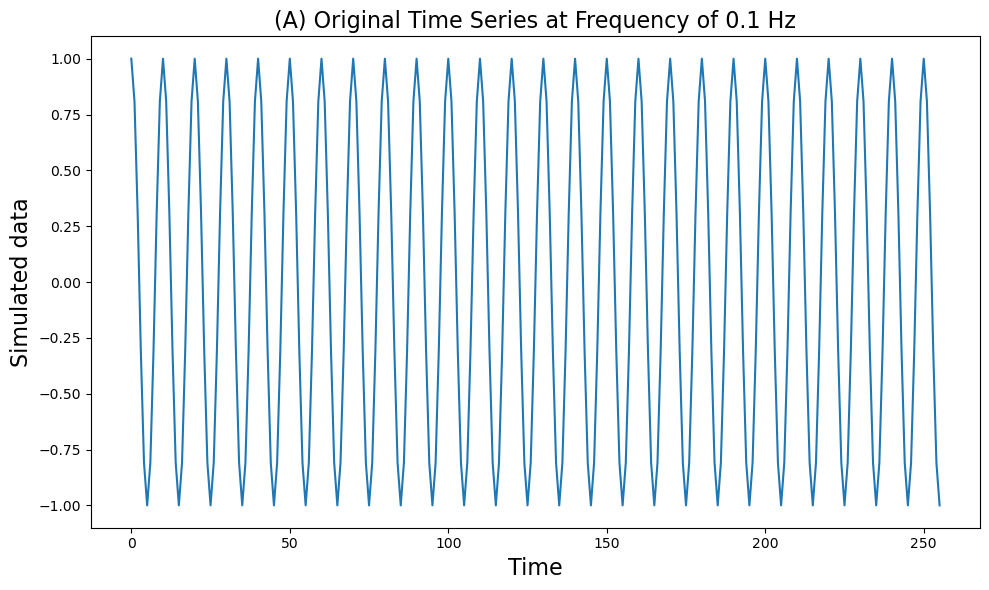

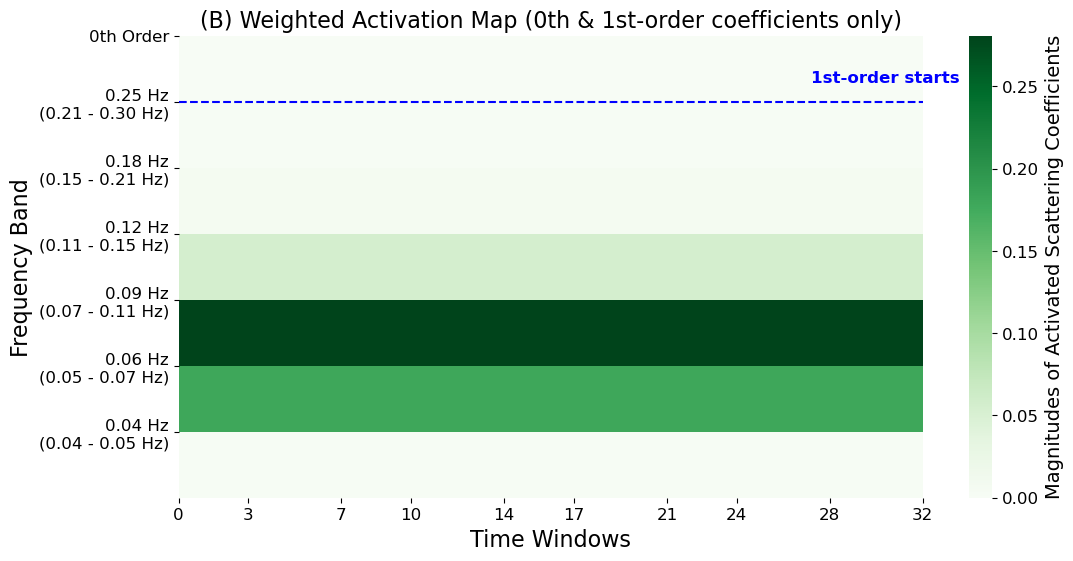

Original Frequency: 0.1 Hz
Recovered Frequency from Scattering: 0.0625 Hz


In [26]:
# 1. Generate the Cosine Signal (frequency 10 Hz)
T = 2**8  # Total time points
t = np.arange(T)
f_true = .1  # True frequency in Hz
f_s = 1 # New sampling frequency to ensure the true frequency is captured

# Generate the cosine wave (normalized by sample rate)
x = np.cos(2 * np.pi * f_true * t / f_s)
print("Shape of x: ", x.shape)

# 2. Plot time series
#fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.plot(t, x)
plt.title(f'(A) Original Time Series at Frequency of {f_true} Hz', fontsize=16)
plt.xlabel("Time", fontsize=16)  # Change font size of x-axis label
plt.ylabel("Simulated data", fontsize=16)  # Change font size of y-axis label
plt.tight_layout()
plt.savefig(f"{fig_path}Sim1A.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 3. Apply Scattering Transform
J = 3  # Number of octaves (controls time resolution)
Q = 2  # Number of wavelets per octave (controls frequency precision)
scattering = Scattering1D(J=J, Q=Q, shape=(T,))

# Compute scattering coefficients
Sx = scattering(x)

# 4. Identify dominant frequency by finding the maximum coefficient
central_frequencies,lower_bounds, upper_bounds, = compute_frequency_bounds(J,Q,f_s)
Sx_avg = np.mean(Sx, axis=1)  # Average over time windows
dominant_idx = np.argmax(Sx_avg)  # Find the most significant wavelet band
recovered_frequency = central_frequencies[dominant_idx]

# 5. Select Only 0th and 1st Order Coefficients
num_zeroth_order = 1  # First row is the 0th order coefficient
num_first_order = J * Q  # Number of first-order coefficients
selected_Sx = Sx[:num_zeroth_order + num_first_order]  # Keep only 0th and 1st order
#selected_freqs = central_frequencies
#selected_lower_bounds = lower_bounds
#selected_upper_bounds = upper_bounds
selected_freqs = central_frequencies[:num_first_order]  # Only first-order central frequencies
selected_lower_bounds = lower_bounds[:num_first_order]
selected_upper_bounds = upper_bounds[:num_first_order]

create_activationMap(selected_Sx, selected_freqs, selected_lower_bounds, selected_upper_bounds, 
                         colors="Greens", barLabel = "Magnitudes of Activated Scattering Coefficients",
                         title="(B) Weighted Activation Map (0th & 1st-order coefficients only)", 
                         saveFile=f"{fig_path}Sim1B.pdf")

# Print results
print(f"Original Frequency: {f_true} Hz")
print(f"Recovered Frequency from Scattering: {recovered_frequency} Hz")

## Illus 2: Change in in Frequency 
This illustration serves to demonstrate a scenario in which a low-frequency sine wave (where $T$ $=$ 1000) is interrupted by a high-frequency transient at $t$ $=$ 500. The first half of the signal consists of a low-frequency cosine wave with a frequency of 0.05 Hz. The second half contains a high-frequency component with a frequency of 0.2 Hz.

* Original Signal: The plot of the signal combines a low-frequency wave and a high-frequency wave.

* First-Order Scattering Coefficients: This plot shows the first-order coefficients, capturing the primary frequency content of the signal. These mainly capture the two cosine waves in different time windows, but they might not fully capture the interaction between different frequency components.

* Second-Order Scattering Coefficients: This plot shows the second-order coefficients, capturing more complex interactions between the two frequency bands at mid-length of the time series. These reveal more detailed interactions, especially highlighting the change point at which the two waves with different frequencies meet. This additional layer of information helps in understanding the signal's complexity better.

Shape of x:  (1024,)


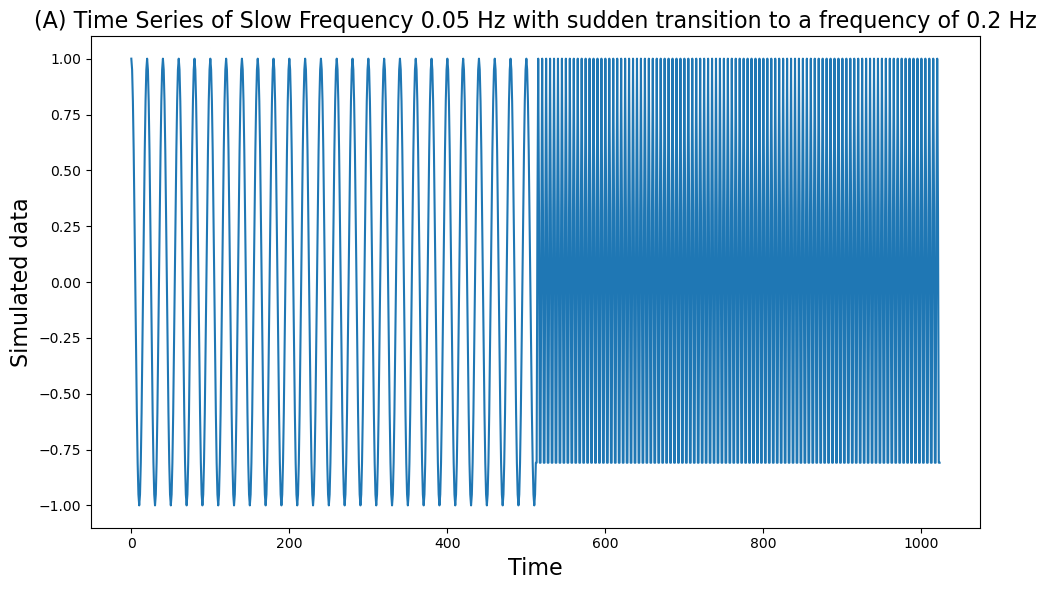

In [33]:
# Define the time range and increase the number of samples
T = 2**10  # Keeping the total duration the same for now
f_s = 1  # Increase the number of samples by a factor
t = np.linspace(0, T-1, T*f_s)

f1_true = .05
f2_true = .2
# Create low-frequency component for the first half
low_freq = np.cos(2 * np.pi * f1_true * t[:len(t)//2])

# Create high-frequency transient for the second half
high_freq = np.cos(2 * np.pi * f2_true * t[len(t)//2:])#*np.exp(-t[:len(t)//2]))

#3 * np.cos(2 * np.pi * f2_true * t[len(t)//2:])# * (np.exp(-((t[len(t)//2:] - 3*len(t)/4)**2) / (2 * (len(t)/128)**2)))

# Combine into one signal with zero padding for first half and high frequency only in second half
x = np.concatenate((low_freq, np.zeros(len(t)//2)))
x[len(t)//2:] = high_freq
#x = np.expand_dims(x.astype(np.float32), axis=0)  
print("Shape of x: ", x.shape)

# 2. Plot time series
#fig, axes = plt.subplots(1, 1, figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.plot(t, x)
plt.title(f'(A) Time Series of Slow Frequency {f1_true} Hz with sudden transition to a frequency of {f2_true} Hz', fontsize=16)
plt.xlabel("Time", fontsize=16)  # Change font size of x-axis label
plt.ylabel("Simulated data", fontsize=16)  # Change font size of y-axis label
plt.tight_layout()
plt.savefig(f"{fig_path}Sim2A.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [29]:
# 3️⃣ Apply Scattering Transform
J = 3  # Number of octaves (time resolution)
Q = 2  # Wavelets per octave (frequency precision)

max_freq = 1/(2**(J/Q))
print("max_freq: ", max_freq)
scattering = Scattering1D(J=J, Q=Q, shape=(T,))

# Compute scattering coefficients
Sx = scattering(x)
Sx_avg = np.mean(Sx, axis=1)


# Print shape of output
print("Scattering Coefficients Shape:", Sx.shape)  # (num_scattering_coeffs, num_time_windows)

# 4. Identify dominant frequency by finding the maximum coefficient
central_frequencies,lower_bounds, upper_bounds, = compute_frequency_bounds(J,Q,f_s)

for i in range(len(central_frequencies)):
   print(f"Band {i}: Central={central_frequencies[i]:.4f} Hz, Low={lower_bounds[i]:.4f} Hz, High={upper_bounds[i]:.4f} Hz")
   
Sx_avg = np.mean(Sx, axis=1)  # Average over time windows
dominant_idx = np.argmax(Sx_avg)  # Find the most significant wavelet band
recovered_frequency = central_frequencies[dominant_idx]

# 5. Select Only 0th and 1st Order Coefficients
num_zeroth_order = 1  # First row is the 0th order coefficient
num_first_order = J * Q  # Number of first-order coefficients
selected_Sx = Sx # Keep only 0th and 1st order
#selected_freqs = central_frequencies
#selected_lower_bounds = lower_bounds
#selected_upper_bounds = upper_bounds
selected_freqs = central_frequencies#[:num_first_order]  
selected_lower_bounds = lower_bounds#[:num_first_order]
selected_upper_bounds = upper_bounds#[:num_first_order]

max_freq:  0.35355339059327373
Scattering Coefficients Shape: (12, 128)
Band 0: Central=0.2500 Hz, Low=0.2102 Hz, High=0.2973 Hz
Band 1: Central=0.1768 Hz, Low=0.1487 Hz, High=0.2102 Hz
Band 2: Central=0.1250 Hz, Low=0.1051 Hz, High=0.1487 Hz
Band 3: Central=0.0884 Hz, Low=0.0743 Hz, High=0.1051 Hz
Band 4: Central=0.0625 Hz, Low=0.0526 Hz, High=0.0743 Hz
Band 5: Central=0.0442 Hz, Low=0.0372 Hz, High=0.0526 Hz


Shape of order_0:  1
Shape of order_1:  7
Shape of order_2:  4


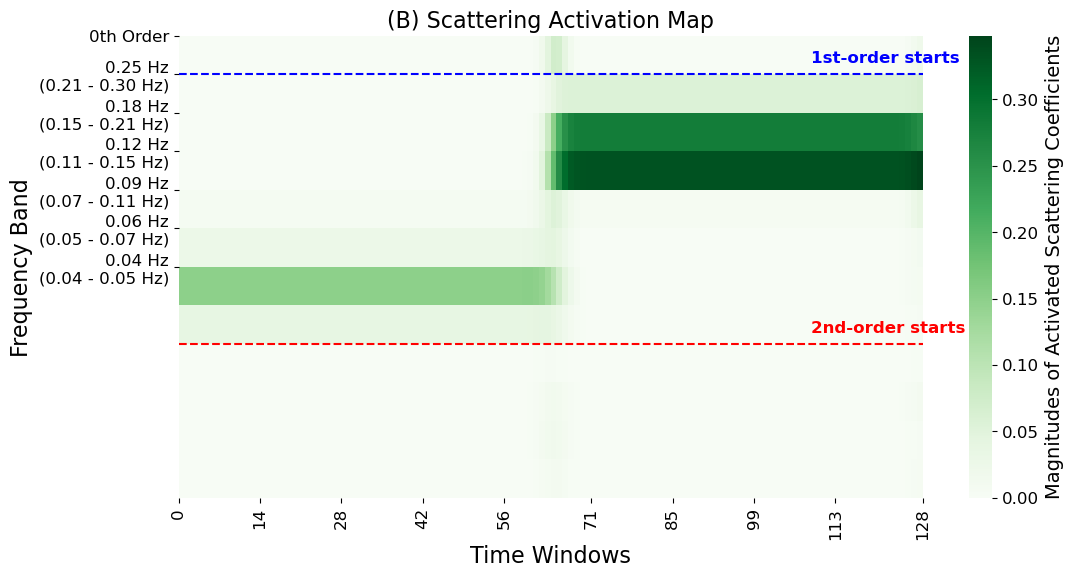

Original Frequencys: 0.05 -> 0.2 Hz
Recovered Frequency from Scattering: 0.08838834764831843 Hz


In [30]:
# Extract first-order and second-order coefficients using metadata
meta = scattering.meta()
order_0 = []
order_1 = []
order_2 = []
for i in range(len(meta['order'])):
    if meta['order'][i] == 0:
        order_0.append(Sx[i, :])
    elif meta['order'][i] == 1:
        order_1.append(Sx[i, :])
    elif meta['order'][i] == 2:
        order_2.append(Sx[i, :])
print("Shape of order_0: ", len(order_0))
print("Shape of order_1: ",len(order_1))
print("Shape of order_2: ",len(order_2))

create_activationMap(selected_Sx, selected_freqs, selected_lower_bounds, selected_upper_bounds, 
                         colors="Greens", barLabel = "Magnitudes of Activated Scattering Coefficients",
                         title="(B) Scattering Activation Map", order_1_start = len(order_0), order_2_start = len(order_0)+len(order_1), plot_2nd = True,
                         saveFile=f"{fig_path}Sim2B.pdf")

# Print results
print(f"Original Frequencys: {f1_true} -> {f2_true} Hz")
print(f"Recovered Frequency from Scattering: {recovered_frequency} Hz")


The plots below look a little clearer for the 2nd-order coefficients due to plotting the 0th, 1st, and 2nd-order coefficients separately. Here I am using the viridis color scheme.

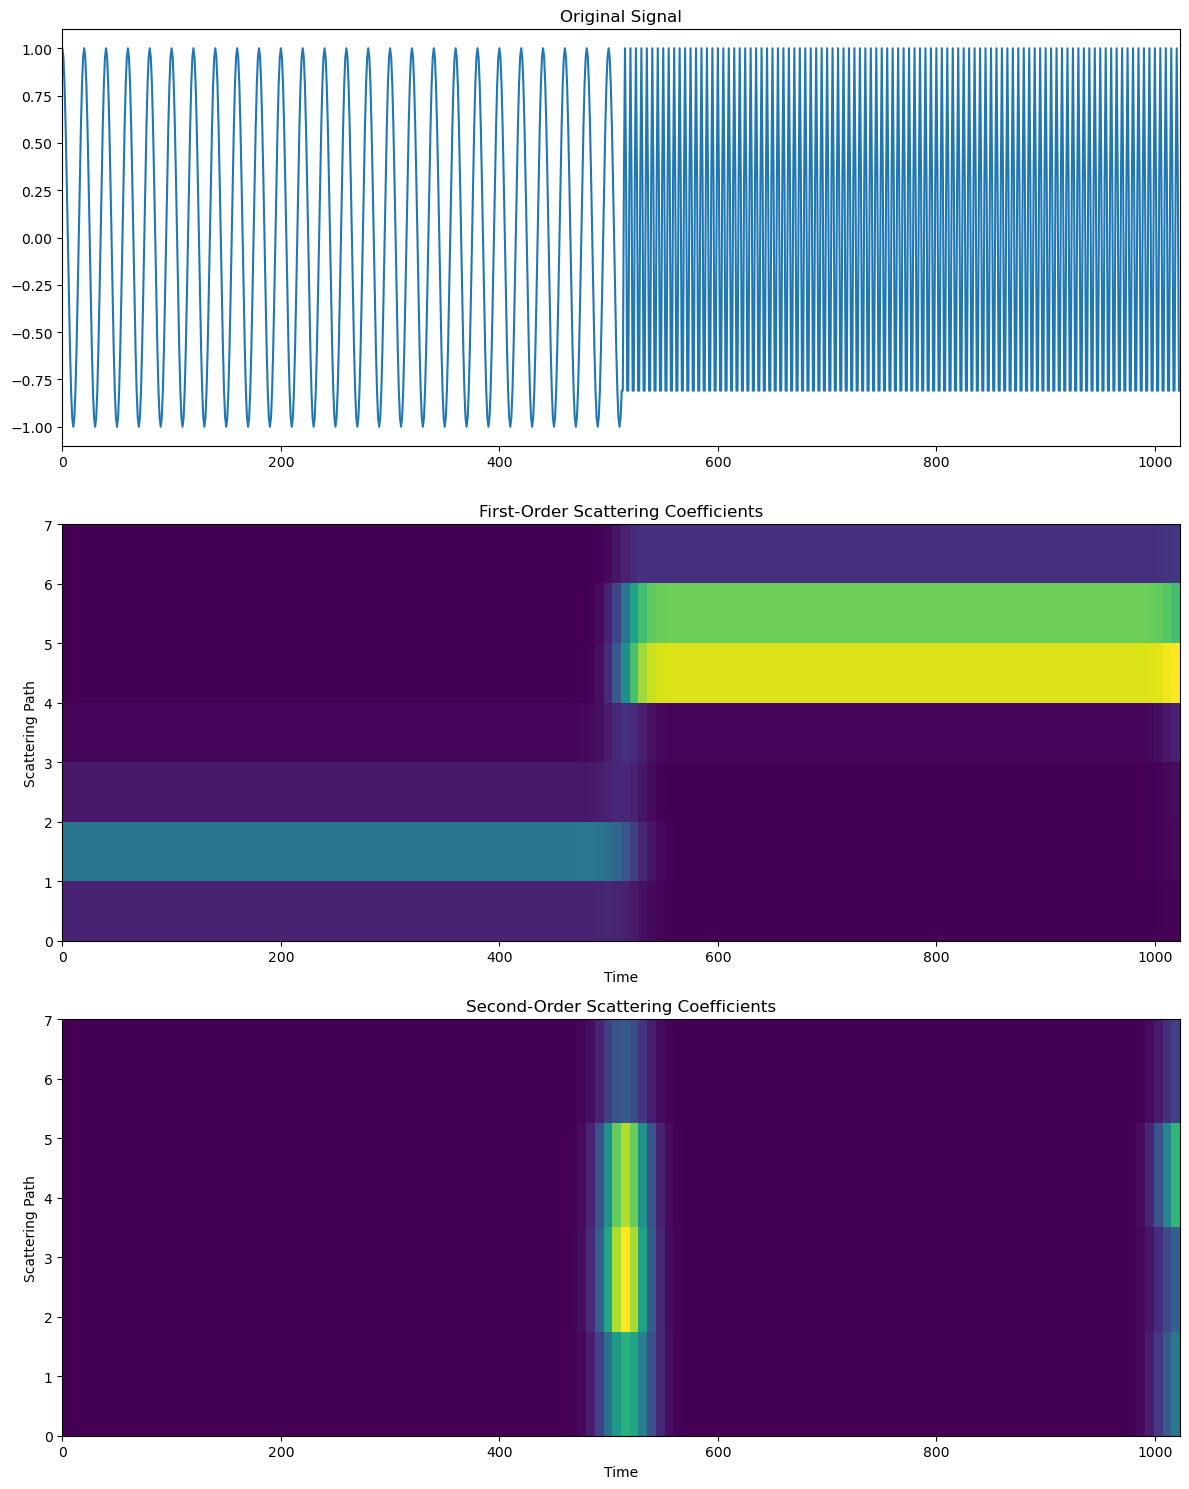

In [32]:
# Convert lists to arrays for easier handling
S0x = np.stack(order_0)
S1x = np.stack(order_1)
S2x = np.stack(order_2)

# Calculate the appropriate time array for the scattering coefficients
scattering_time = np.linspace(0, T-1, S2x.shape[1])

# Plot original signal, first-order, and second-order scattering coefficients
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Original signal
axes[0].plot(t, x)
axes[0].set_title('Original Signal')
axes[0].set_xlim([0, max(t)])

# First-order coefficients
axes[1].imshow(np.abs(S1x), aspect='auto', cmap='viridis', extent=[0, max(t), 0, S1x.shape[0]])
axes[1].set_title('First-Order Scattering Coefficients')
axes[1].set_ylabel('Scattering Path')
axes[1].set_xlabel('Time')

# Second-order coefficients
axes[2].imshow(np.abs(S2x), aspect='auto', cmap='viridis', extent=[0, max(t), 0, S1x.shape[0]])
axes[2].set_title('Second-Order Scattering Coefficients')
axes[2].set_ylabel('Scattering Path')
axes[2].set_xlabel('Time')


## Second-order coefficients
#for i in range(S2x.shape[0]):
#    axes[2].plot(scattering_time, np.abs(S2x[i, :]), label=f'Path {i+1}')
#axes[2].set_title('Second-Order Scattering Coefficients')
#axes[2].set_ylabel('Coefficient Value')
#axes[2].set_xlabel('Time')
##axes[2].legend(loc='upper right') #Suppress legend

plt.tight_layout()
plt.show()